<a href="https://colab.research.google.com/github/wanpingDou/Pytorch-Camp/blob/master/hello%20pytorch/lesson_jupyter/04_Computational_Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 计算图

pytorch最大的特性——动态图机制，动态图机制是pytorch与tensorflow最大的区别，该部分首先介绍计算图的概念，并通过演示动态图与静态图的搭建过程来理解动态图与静态图的差异。

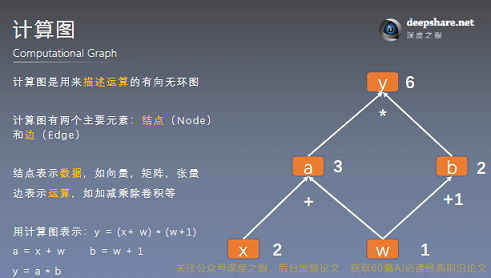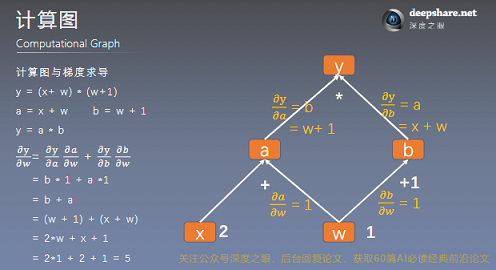
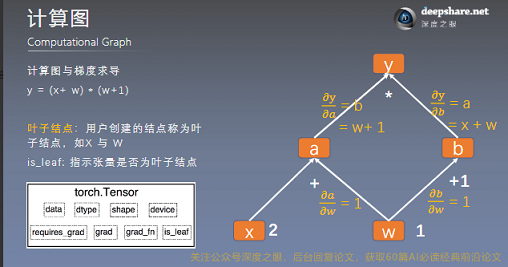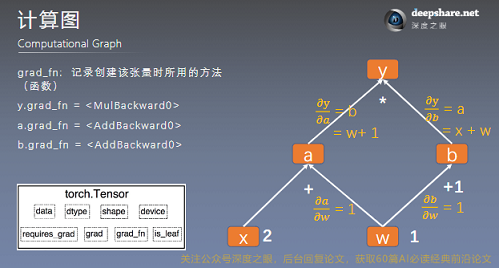
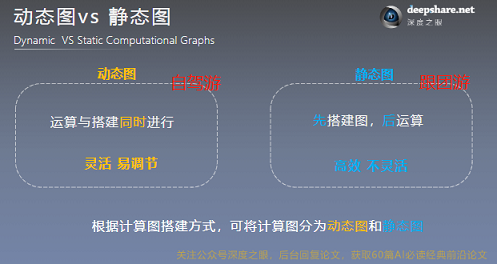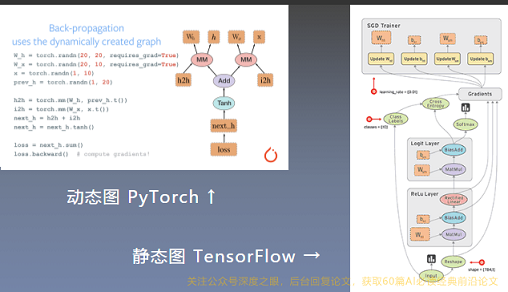

### [静态计算图vs动态计算图](https://zhuanlan.zhihu.com/p/145353262)

- `静态计算图`

> 理论上神经网络模型定义好以后就无需更改，当计算图构建好以后，在一轮轮的前向传播/反向传播迭代中可以重复使用此计算图，只不过将计算的梯度值不断更新到每个变量节点处即可，这种方式称为静态计算图，而早期的tensorflow采用的就是静态计算图的方式。

- `动态计算图`

> 什么是动态计算图 ？和静态图相反，pytorch在设计中采取了动态计算图的方式，即反向传播的计算图是动态更新的。每一轮反向传播开始时(前向传播结束后)都会动态的重新构建一个计算图，当本次反向传播完成后，计算图再次销毁。这种动态更新的方式允许用户在迭代过程中更改网络的形状和大小。

- `个人理解`

> 理论上静态图，更节省内存，速度更快；动态图更灵活自由，不过牺牲了部分速度和内存空间。但实际并不一定，因为深度学习框架不仅仅是计算图，还涉及到其他代码和底层优化，所以究竟是哪种更好，需要自行判断～

### 要点

- Tensor.retain_grad：显式地保存非叶节点的梯度，代价就是会增加显存的消耗。用于判断该tensor是否需要被跟踪，用以计算梯度，默认为False。
- Tensor.hook：在反向计算时直接打印，不会增加显存消耗，但是使用起来retain_grad()要比hook函数方便一些。
- data：存放的是该张量的数据；
- grad：初始为None；requires_grad = False时为None，否则当某out节点调用out.backward()时，生成新tensor节点，存放计算后的∂out/∂x梯度值，梯度值不会自动清空(下次调用out.backward()时可累积)
- grad_fn：反向传播时，用来计算梯度的函数；
- is_leaf：表明该tensor是否为叶子节点

In [8]:
# -*- coding:utf-8 -*-
"""
@file name  : lesson-04-Computational-Graph.py
@author     : TingsongYu https://github.com/TingsongYu
@date       : 2018-08-28
@brief      : 计算图示例
"""
import torch

w = torch.tensor([1.], requires_grad=True)
x = torch.tensor([2.], requires_grad=True)

a = torch.add(w, x)
# a.retain_grad()  # 记录a的梯度
b = torch.add(w, 1)
y = torch.mul(a, b)

y.backward()
print(w.grad)

# 查看叶子结点
print("is_leaf:\n", w.is_leaf, x.is_leaf, a.is_leaf, b.is_leaf, y.is_leaf)

# 查看梯度
print("gradient:\n", w.grad, x.grad, a.grad, b.grad, y.grad)

# 查看 grad_fn
print("grad_fn:\n", w.grad_fn, x.grad_fn, a.grad_fn, b.grad_fn, y.grad_fn)



tensor([5.])
is_leaf:
 True True False False False
gradient:
 tensor([5.]) tensor([2.]) tensor([2.]) None None
grad_fn:
 None None <AddBackward0 object at 0x7fa3fc788f28> <AddBackward0 object at 0x7fa3f4624b70> <MulBackward0 object at 0x7fa3f4624b38>


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
